<a href="https://colab.research.google.com/github/Rafitipiti/TF---Procesamiento-de-Im-genes/blob/master/TF_PROC_IMAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento Digital de Imágenes - Trabajo Final

## Integrantes

*   Alumno 1: <font color='green'> u201812443 - Rafael Andrade Rodríguez </font>
*   Alumno 2: <font color='green'> u201810807 - Joaquin Flores Palao </font>
*   Alumno 3: <font color='green'> u201712106 - Abraham Alvarez Crespo </font> 

## Objetivos

El trabajo (TF), tiene por objetivo evaluar que el alumno cubra las competencias de:
- Manejo de la Información: Capacidad de identificar la información necesaria, así como de buscarla, seleccionarla, evaluarla y usarla éticamente,
con la finalidad de resolver un problema.
- Formula y Resuelve Problemas Complejos: Analizar un problema
de computación complejo y aplicar principios de computación y otras disciplinas relevantes para identificar soluciones.


## Instrucciones

El trabajo podrá ser realizado en grupos de 3 alumnos.
El trabajo deberá ser realizado en google colab noteboooks utilizando
también github. El trabajo consistirá en los siguientes hitos:
1. Primer Hito: Adquisición de las imágenes de entrada, recopilación
de un dataset de imágenes de partituras simples, mediante diversos dispositivos tales como cámara fotográfica, scanner, archivos pdf,etc. Este hito debe ser realizado en conjunto por toda la sección, totalizando al menos 200 imágenes de partituras. Entre las imágenes mencionadas, no solo deben haber imágenes ideales sino de partituras rotadas tomadas desde un ángulo que deforme visualmente el recuadro de la hoja que contiene a la partitura, con alteraciones de iluminación y pérdidas por compresión de imágenes.
2. Segundo Hito: Entrega del documento con la solución planteada desde el ingreso de cualquier imagen de la naturaleza descrita en el hito
anterior, hasta la salida de la melodía interpretada en dicha imagen. Deben indicarse, también, las ideas de solución alternativas que
puedan haberse considerado. Los alumnos deben asegurarse que su
programa no tenga problemas para abrir ninguna imagen contenida
en el dataset.
3. Tercer Hito: Entrega del documento en formato paper siguiendo las
pautas en el modelo otorgado por el docente.

## Introducción

En el presente trabajo se sustentará el uso de determinadas técnicas de programación aprendidas a lo largo del curso en torno al procesamiento digital de imágenes para la lectura de partituras y la representación sonora de la misma.

Nuestro proyecto tiene un impacto relevante en las personas interesadas en aprender música, puesto que la interpretación de partituras constituye uno de los principales problemas a los que estos estudiantes deben afrontar.

## Metodología

#### **Metodología de Trabajo:**
- Los miembros del equipo nos hemos comunicado de manera constante durante todo el desarrollo del trabajo mediante la plataforma Discord.
- Hemos utilizado la misma sesión de colab y nos dividimos las funciones empleadas en la solución del problema.
- Ante alguna dificultad, hemos tratado de combatirla en conjunto, probando distintas alternativas y guardando los avances cuando alguna parte del código se encontraba funcional.


#### **Metodología de la Solución:**

La idea se desarrolla alrededor de la identificación de notas mediante el uso de la función matchtemplate y un conjunto de librerías que permiten la reproducción musical. A grandes rasgos se puede visualizar como:
1. Almacenar posiciones de las notas detectadas en un arreglo
2. Ordenar coordenadas y, x
3. Recorrer las coincidencias y reproducir el audio

Más detalladamente nos encontramos con:
1. Cargamos imágenes de las notas como modelo para realizar la búsqueda, y las agregamos a una lista. A su vez, cargamos la imagen de la partitura.
2. Añadimos un ruido aditivio gaussiano a cada modelo de nota por medio de una variable *th* para que los bordes no se vean borrosos.
3. De ser necesario, rotamos la imagen que contiene el texto para que se encuentre lo más recta posible.
4. Recorremos el arreglo que contiene los modelos de las notas, a cada una le aplicamos la función <font color=brick>*match_template*</font> para encontrar las áreas que concuerden con dichos elementos, estas coordenadas son almacenadas en una lista, junto con el valor de su similitud y la nota correspondiente.
5. Esta lista con coordenadas pasa por la función <font color=brick>*reduce_equals*</font>, la cual junta los puntos que se encuentran muy juntos, pues estos son **falsos positivos** de la misma nota, y regresamos una única coordenada para cada grupo de puntos.

6. Después de ser reducidas a un único punto por posición se ordenan las notas en base a las cordenadas **(y, x)**, en seguida de esto se genera un *par* de la escala y la nota que le corresponde, y se agregan a una lista general de todos lo caracteres en la imagen.

7. Para hallar la nota correspondiente se tiene que realizar una serie de pasos, el primero es hallar la posición "Y" de cada una de las últimas líneas de los pentagramas que presenta nuestra partitura y la longitud entre líneas de los pentagramas.

8. Una vez que tengamos la lista de coordenadas, podremos comparar la posición "Y" que hallamos con el <font color=brick>*match_template*</font> disminuyendo la mitad de longitud entre líneas de nuestra posición más baja del pentagrama. Esta iterará 23 veces. En cada iteración, se hallará la diferencia absoluta entre la coordenada del match y la del pentagrama. La iteración en la que nuestra diferencia sea la menor será la que nos dé el valor de nuestra nota.

9. Una vez obtenida la nota, podemos sacar el valor de la octava con tres reglas en función del valor de nuestra nota y, de este modo, almacenar en un arreglo los valores de nota y octava que ya están en orden.

8. Por último, recorremos el arreglo de notas generado y llamamos a la función <font color=brick>*beep*</font>, la cual se encarga de reproducir el sonido correspondiente.

## Desarrollo


In [ ]:
#!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local/
#!rm Miniconda3-latest-Linux-x86_64.sh
#!conda install -y --prefix /usr/local/ ujson aiohttp tqdm
!pip install latex

#!conda uninstall portaudio
!sudo apt-get install python3-pip
!sudo apt-get install PortAudio19-dev
!sudo apt-get install libasound-dev
!sudo apt-get install libportaudio2
!pip install sounddevice


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.4).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package PortAudio19-dev
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libasound2-dev is already the newest version (1.1.3-5ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import cv2
from skimage import color
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.transform import resize, rescale
import numpy as np
from skimage.io import imread, imsave
from skimage.feature import match_template
from google.colab.patches import cv2_imshow
from google.colab import drive
from tqdm import tqdm
from math import exp, log
import numpy as np
import os 

from math import exp, log
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")
#import sounddevice as sd
import atexit


In [ ]:
drive.mount('/content/drive', force_remount=True) #comentar

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/notas2/' #comentar

In [ ]:
#comentar
stack = []
for filename in tqdm(os.listdir(data_path)):
    path = os.path.join(data_path,filename)
    im = imread(path,as_gray=True)
    im = color.rgb2gray(im)
    stack.append(im)

In [ ]:
!unzip notas2.zip

Archive:  notas2.zip
replace notas2/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: notas2/1.png            
  inflating: notas2/2.png            
  inflating: notas2/3.png            
  inflating: notas2/4.png            
  inflating: notas2/5.png            
  inflating: notas2/6.png            
  inflating: notas2/7.png            
  inflating: notas2/8.png            


In [ ]:
# leyendo las imagenes de las notas
stack = []
for i in range(8):
  im = imread('notas2/{}.png'.format(str(i+1))) #para agregar el i en la ruta de la imagen
  im = color.rgb2gray(im)
  stack.append(im)


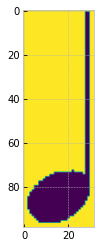

In [ ]:
# aplicando el ruido aditivo gaussiano
th = 0.3 #@param {type:"slider", min:-1, max:1, step:0.01}
for i in range(len(stack)):
  stack[i] = stack[i]>=th

plt.imshow(stack[3]);

In [ ]:
def order(p):
    n_p =np.concatenate([p[0],p[1],p[2],p[3]]).tolist()
    y_o=sorted(n_p, key=lambda n_p: n_p[1])
    x1_o= y_o[:2]
    x1_o=sorted(x1_o, key=lambda x1_o: x1_o[0])
    x2_o= y_o[2:4]
    x2_o=sorted(x2_o, key=lambda x2_o: x2_o[0])
    return [x1_o[0],x1_o[1], x2_o[0], x2_o[1]]

def perspective(imagen):
  plt.imshow(imagen)
  gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  ced = cv2.Canny(gray, 10,150)
  ced = cv2.dilate(ced, None, iterations=1)
  cnts = cv2.findContours(ced,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:1]

  for i in cnts:
    p = 0.01*cv2.arcLength(i, True)
    ap = cv2.approxPolyDP(i, p, True)
    if len(ap) == 4:
        cv2.drawContours(imagen, [ap], 0, [0,255,255], 2)
        puntos = order(ap)
        pts1 = np.float32(puntos)
        pts2 = np.float32([[0,0],[270,0],[0,310],[270,310]])
        m = cv2.getPerspectiveTransform(pts1, pts2)
        dts = cv2.warpPerspective(gray, m, (270,310))
  #ACTUALIZO MI VARIABLE
  texto = dts
  cv2_imshow(dts)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

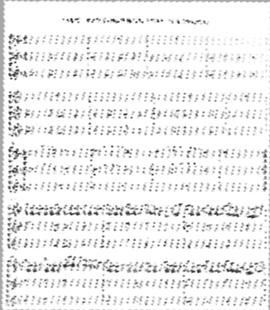

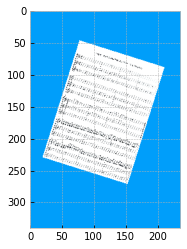

In [ ]:
imagen = cv2.imread('aaa.png') #LEO IMAGEN DE PRUEBA
perspective(imagen)

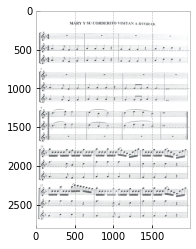

In [ ]:
part = cv2.imread('mary.jpg')
part_gray = cv2.cvtColor(part, cv2.COLOR_BGR2GRAY).copy()
plt.imshow(part)

alt, anc,_ = part.shape

In [ ]:
edges = cv2.Canny(part_gray, 50, 150, apertureSize = 3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

coords = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    coords.append((x1,y1,x2,y2))
    #cv2.line(part, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)

#cv2_imshow(edges)
#cv2_imshow(part)

In [ ]:
def removeCoords(todelete,coords):
    #Limpiamos las posiciones que se hayan agregado al arreglo  
    #todelete de manera repetida.
    aux = [] 
    for i in todelete: 
        if i not in aux: 
            aux.append(i)
    todelete = aux

    #Removemos las coordenadas de las posiciones previamente calculadas 
    for i in range(len(todelete)):
      coords.pop(todelete[i]-i)
    return coords


def cleanLines(coords):
  todelete = []
  # Limpiamos las coordenadas repetidas y que se generen a partir
  # de la 5ta parte del ancho de la hoja hacia la derecha,
  #también las que tengan la diferencia entre su posición y1 - y2
  # mayor a 3 y la diferencia de su x2 - x1  menor igual a 3
  for i in range(len(coords)-1):
    if coords[i][1] == coords[i+1][1]:
      todelete.append(i+1)
    if coords[i][0] >= (anc/5) :
      todelete.append(i)
    if (abs(coords[i][1] - coords[i][3])) > 1 :
      todelete.append(i)
    if (coords[i][2]- coords[i][0]) <= 3:
      todelete.append(i)

  #Llamamos a la función declarad previamente para eliminar las coordenas
  #que no son útiles
  coords = removeCoords(todelete, coords)

  #Ordenamos nuestro arreglo en función a y1 y x1
  coords = sorted(coords , key=lambda k: [k[1], k[0]])

  #Procedemos a relizar una segunda limpieza comparnado las coordenadas
  #con sus vecinos que tengan una distancia en relación al eje Y
  #muy corta.
  todelete1 = []
  for i in range(len(coords)-1):
    if abs(coords[i][1] - coords[i+1][1]) < 5:
      todelete1.append(i+1)

  coords = removeCoords(todelete1, coords)
  return coords

In [ ]:
coords = cleanLines(coords)

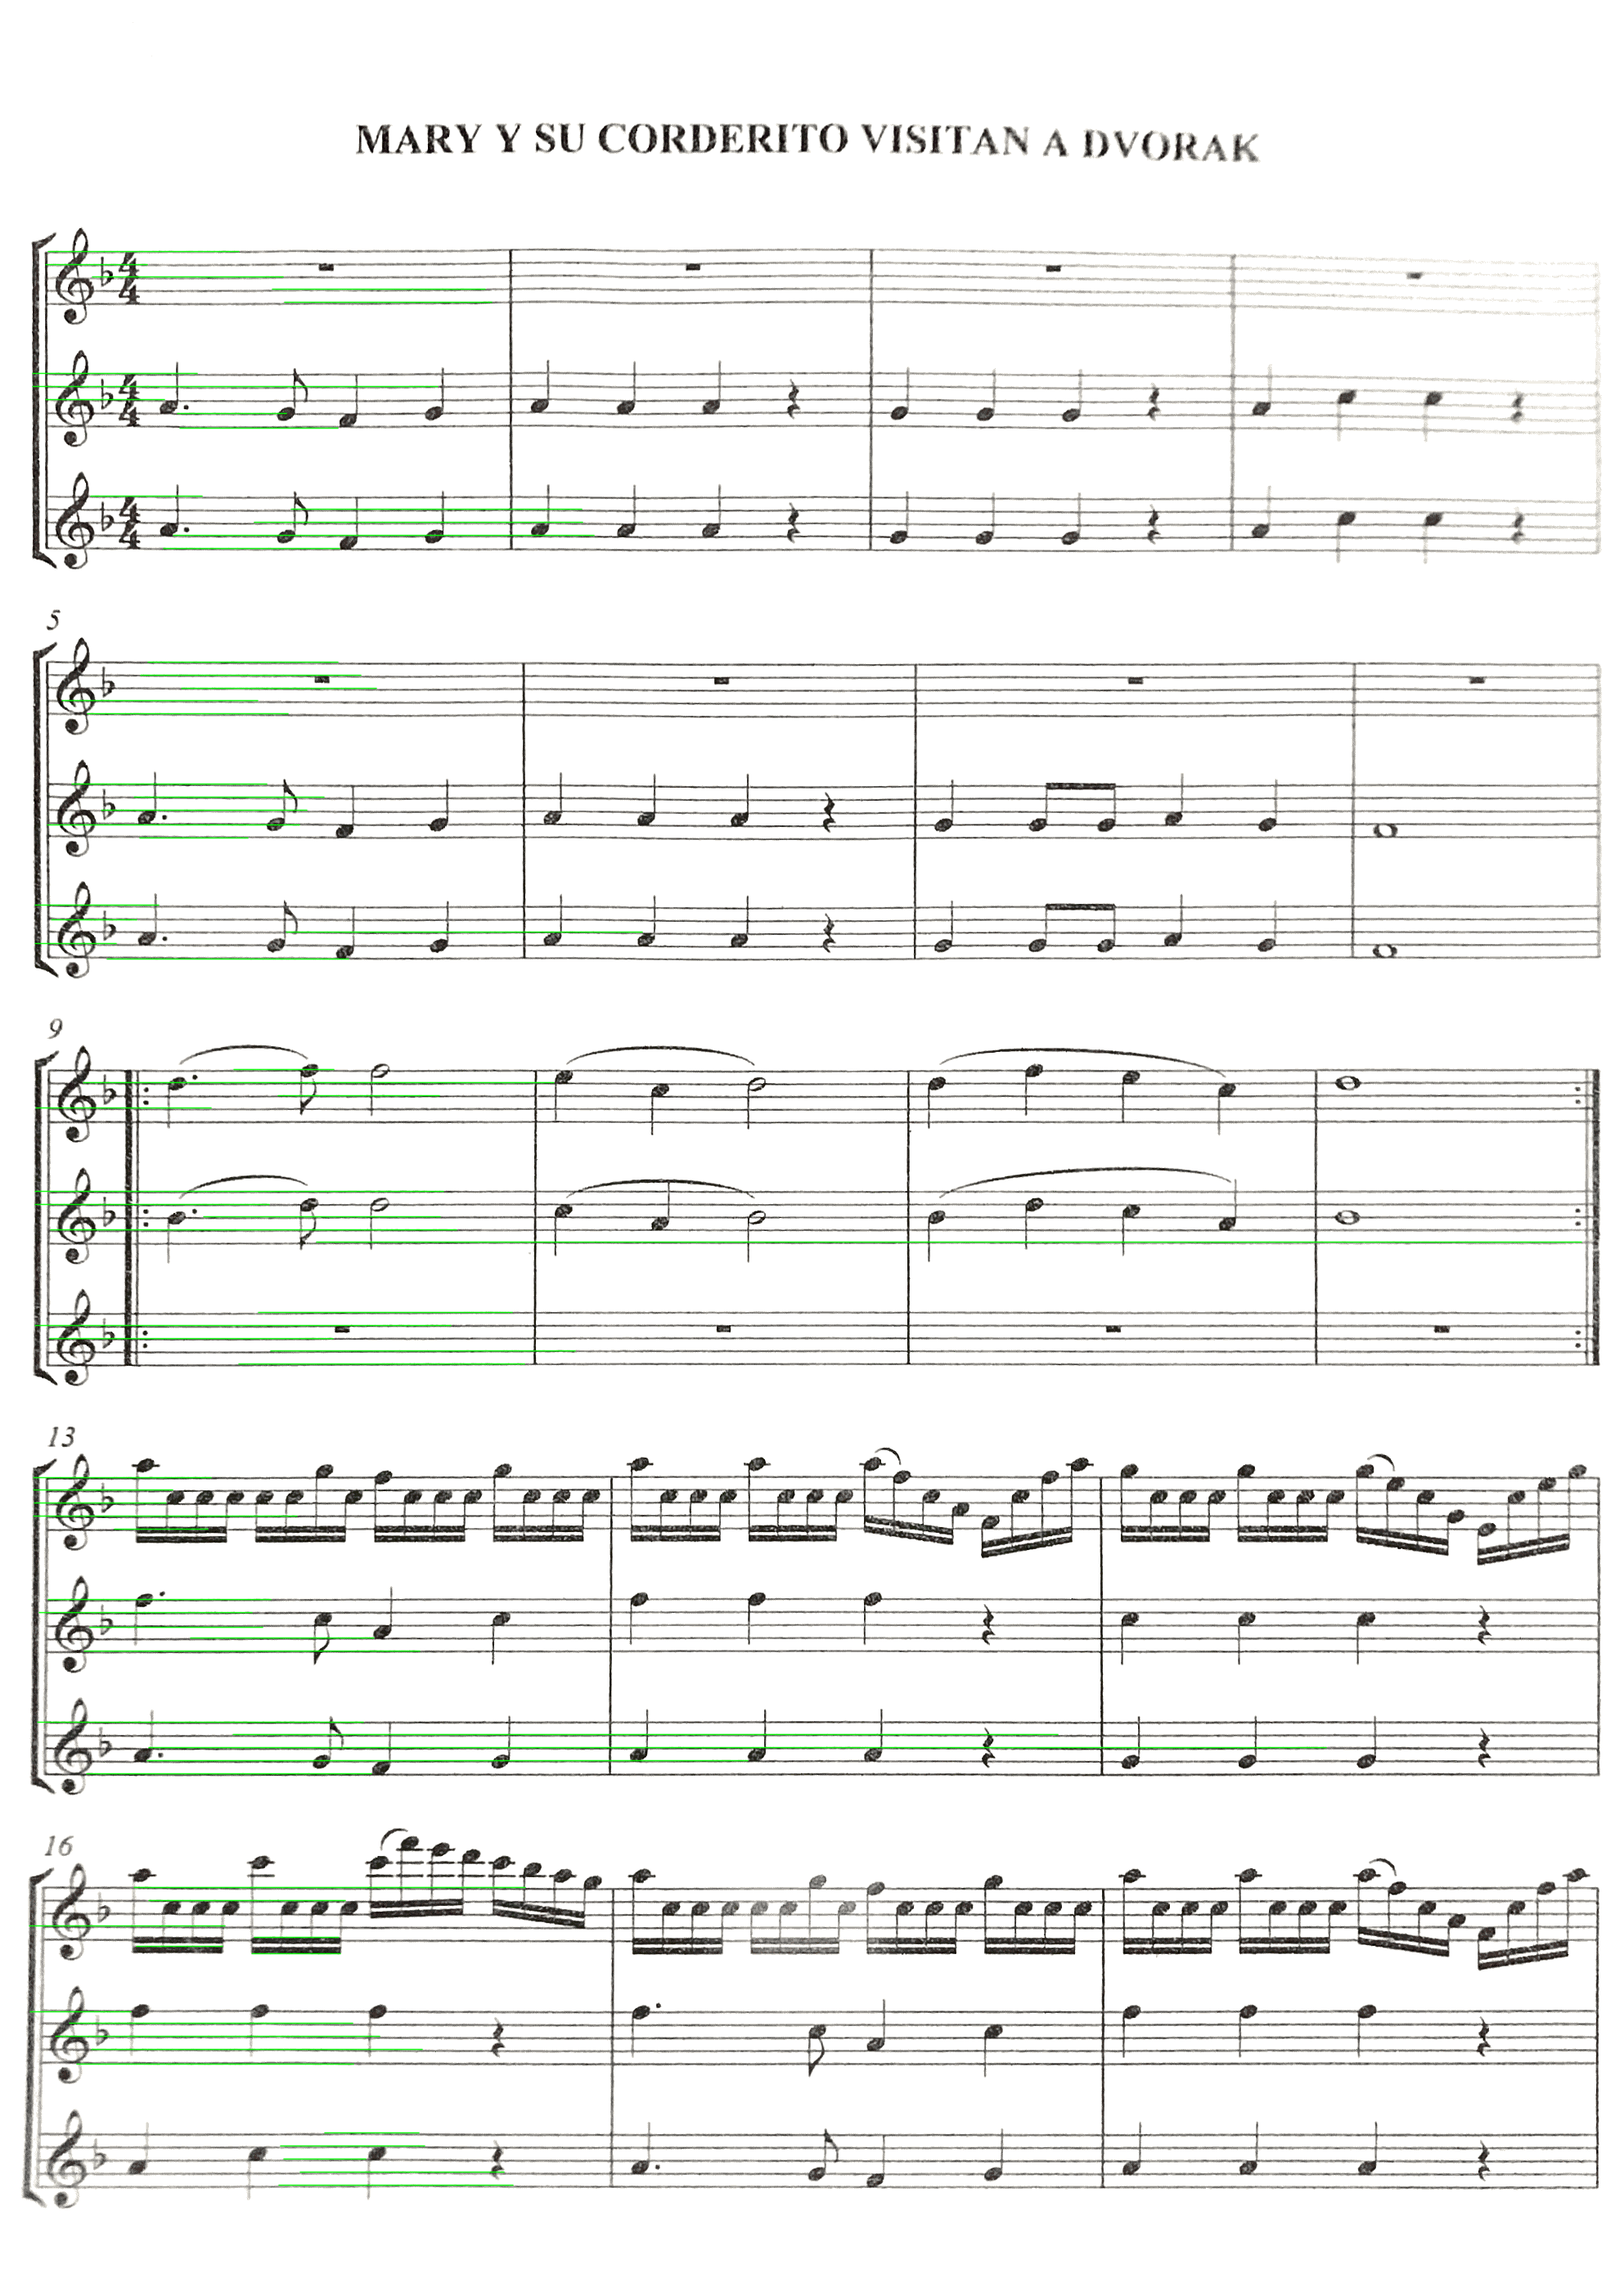

In [ ]:
for i in range(len(coords)):
  cv2.line(part, (coords[i][0],coords[i][1]), (coords[i][2],coords[i][3]), (0,255,0), 1, cv2.LINE_AA)
cv2_imshow(part)

In [ ]:
def cut_indices_coords(arr):
    for i in range(len(arr)-1):
       if arr[i+1] - arr[i] > 4:
            yield i+1

def splitter_coords(arr):
    px = 0
    for x in cut_indices_coords(arr):
        yield arr[px:x]
        px = x
    yield arr[px:]

def cluster_coords(arr):
    cluster_ids = range(len(arr))
    return dict(zip(cluster_ids, splitter_coords(arr)))

In [ ]:
def getDiferencias(coords):
  #Hallar las diferencias entre lineas utilizando
  #la posición Y de cada coordenada
  diferencias = []
  for i in range(len(coords)-1):
    dif = coords[i+1][1] - coords[i][1]
    diferencias.append(dif)
  #Remover los valores de diferencias que se hayan
  #repetido
  auxDif = [] 
  for i in diferencias: 
      if i not in auxDif: 
          auxDif.append(i)
  diferencias = auxDif

  #Ordenar el arrego de diferencias en órden ascente
  diferencias = sorted(diferencias)

  #Agrupar los valores de diferencias dependiendo a que tan cercano están
  #de los otros valores
  difss = cluster_coords(diferencias)

  #Convertir diccionario a arreglo
  diferencias = []
  for i in range(len(difss)):
    diferencias.append(difss[i])

  #Hallar los promedios de los grupos de valores de diferencias
  #y eliminar los valores que se encuentren en clusters unitarios
  promeds = []
  for i in range(len(diferencias)):
    if len(diferencias[i]) > 1:
      c = 0
      for j in range(len(diferencias[i])):
        c += diferencias[i][j]
      prom = round((c/len(diferencias[i])))
      prom = int(prom)
      promeds.append(prom)
      
  return promeds

In [ ]:
promeds = getDiferencias(coords)
promeds

[15, 84, 137]

In [ ]:
def getCoordenadas(coords,promeds):
  fila, penta, tri  = promeds
  len_nota = fila/2
  y_inicial = coords[0][1]
  posiciones_y = []
  contador = 0
  distancia_max = alt - y_inicial
  y_aux = y_inicial

  cont = -y_inicial

  while y_aux < distancia_max:
    pentas = []
    #pentagramas
    for i in range(3):
      filas = []
      #cuerdas
      for j in range(5):
        filas.append(y_aux)
        if j != 4:
          y_aux += fila
      if i != 2:
        y_aux += penta
      pentas.append(filas)

    posiciones_y.append(pentas)
    y_aux += tri
  
  lasts = []
  for i in range(len(posiciones_y)):
    for j in range(len(posiciones_y[i])):
      lasts.append(posiciones_y[i][j][4])

  standard = []
  ## Estandarizamos
  for i in range(len(lasts)): 
    standard.append(lasts[i] + len_nota*7)

  return posiciones_y, lasts, standard, len_nota

In [ ]:
_, _, stand, len_nota = getCoordenadas(coords, promeds)

In [ ]:
def hallarNota(coordenada, standard, len_nota):
  nota = 0
  oct=2
  for i in range(len(standard)):
    if coordenada < standard[i]:
      temp = 100000
      aux = standard[i]     
      for j in range(23):
        absol = abs(coordenada - aux)
        if absol < temp:
          temp = absol
          nota = j
          aux = aux - len_nota    
      if nota>6 and nota<14:
        nota-=7
        oct=3
      if nota>=14 and nota<=20:
        nota-=14
        oct=4
      if nota>=21:
        nota-=21
        oct=5
      break   

  return nota,oct

In [ ]:
###Probando la función hallarNota
print(hallarNota(1500, stand,len_nota))

(4, 2)


In [ ]:
#nombres = ["eights","eight", "eight", "quarter","flat", "whole","half","half","quarter","sharp","g-clef","bar","bars","line","staff"]
nombres = ["eights","eight", "eight", "quarter", "whole","half","half","quarter"]

384
[(1630, 398, 0.64422851992119, 3), (1631, 398, 0.6403009923234353, 3), (1628, 399, 0.6433160249076646, 3), (1629, 399, 0.6547696764305222, 3), (1630, 399, 0.65569053048146, 3), (1631, 399, 0.6518749391154391, 3), (1632, 399, 0.6435913436143064, 3), (1628, 400, 0.6550089865458253, 3), (1629, 400, 0.6630445554549868, 3), (1630, 400, 0.6629768076729337, 3), (1631, 400, 0.6569426581941857, 3), (1632, 400, 0.6501042159668635, 3), (1627, 401, 0.6506480710938075, 3), (1628, 401, 0.6632316263338571, 3), (1629, 401, 0.667505071202104, 3), (1630, 401, 0.6643352864457954, 3), (1631, 401, 0.6606919615496362, 3), (1632, 401, 0.6528752837692522, 3), (1734, 401, 0.6438499525261395, 3), (1735, 401, 0.6486968624867331, 3), (1736, 401, 0.6493117565617215, 3), (1737, 401, 0.644763659199668, 3), (1627, 402, 0.6500228442348527, 3), (1628, 402, 0.6611801628511005, 3), (1629, 402, 0.6632024014959819, 3), (1630, 402, 0.6598111889096849, 3), (1631, 402, 0.6552335647255411, 3), (1632, 402, 0.645581442994788

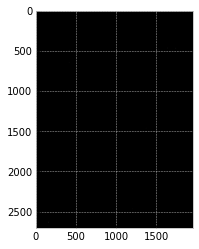

In [ ]:
# buscando la coincidencia de patrones de los caracteres en la imagen
# HACER QUE RECONOZCA LA NOTA (POS VERTICAL)
arr = []

for i in range(len(stack)):
  im_template = match_template(part_gray, stack[i])[:,:]
  height, width = im_template.shape
  for j in range(height):
    for k in range(width):
      if im_template[j][k]>0.64:
        arr += {(k,j,im_template[j][k],i)}

  plt.imshow(im_template>=0.64,cmap='gray')

print(len(arr))
print(arr)

In [ ]:
def cut_indices(arr):
    for i in range(len(arr)-1):
        if arr[i+1][1] - arr[i][1] > 10:
            yield i+1

def splitter(arr):
    px = 0
    for x in cut_indices(arr):
        yield arr[px:x]
        px = x
    yield arr[px:]

def cluster(arr):
    arr = sorted(arr, key=lambda tup: tup[1])
    cluster_ids = range(len(arr))
    return dict(zip(cluster_ids, splitter(arr)))

In [ ]:
# ordena los puntos repetidos de la misma nota
def reduce_equals(pos):
  sortedd = sorted(pos, key=lambda tup: tup[0])
  todelete = []
  x,y,z,ind = sortedd[0]
  for i in range(1,len(sortedd)):
    xa,ya,za,inda = sortedd[i]
    for j in range(0, i):
      x,y,z,ind = sortedd[j]
      if(abs(xa-x)<2 and not (j in todelete)):
        if(z>za):
          todelete.append(i)
          break
        else:
          todelete.append(j)
  return sortedd, todelete

# borra caractere sobrepuestos de la lista
def actualize(pos):
  s,t = reduce_equals(pos)
  #print(len(s), " ", len(t))
  t = sorted(t)
  for i in range(len(t)):
    s.pop(t[i]-i)
  return s

def reduce_equals_f(dicc):
  lineas = []
  dicc = cluster(dicc)

  for i in range(len(dicc)):
    linea = actualize(dicc[i]) #RETORNA ARREGLO
    lineas.append(linea)
  return lineas



(188, 414, 0.6445072299132577, 3)
(641, 411, 0.6723648361303216, 3)
(747, 414, 0.6608513345121765, 3)
(851, 412, 0.6515128621139504, 3)
(1524, 416, 0.6588707552087532, 3)
(1629, 401, 0.667505071202104, 3)
(1631, 401, 0.6606919615496362, 3)
(1734, 403, 0.6624589083790711, 3)
(1736, 403, 0.6604421536410312, 3)
(1738, 403, 0.6462803198316683, 3)


(1527, 486, 0.6439646750636417, 7)
(1633, 471, 0.6490895981300836, 7)
(1738, 474, 0.6498262444991333, 7)


(413, 499, 0.6454583855412102, 7)


(188, 563, 0.6634379412045712, 3)
(641, 563, 0.6605202911867357, 3)
(1628, 550, 0.6605569212869007, 3)
(1630, 550, 0.6538469746973208, 3)
(1735, 551, 0.6584730998230188, 3)
(1737, 551, 0.6512769912125733, 3)


(412, 650, 0.6423021492943826, 7)


(885, 918, 0.6537061428559858, 3)


(408, 1002, 0.6447775329094508, 7)


(161, 1063, 0.6486166839566984, 3)


(1487, 1319, 0.6509371023199905, 7)


(1370, 1467, 0.6499846120617264, 7)


(159, 1707, 0.6413019279155555, 3)
(379, 1716, 0.6457025920103631, 3)
(1363,

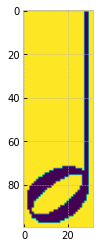

In [ ]:
plt.imshow(stack[5]);
orderedarr = reduce_equals_f(arr)

for i in orderedarr:
  print("\n")
  for j in i:
    print(j)


## **Detección de nota**

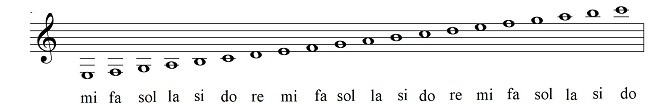

In [ ]:
def fix_y(orderedarr,standard, len_nota):
  values = []
  dist_nota = len_nota*2

  for i in range(len(orderedarr)):
    oc = 2
    for j in range(len(orderedarr[i])):
      im = orderedarr[i][j][3]
      
      if im == 0 or 1 or 3 or 5:
        new_y = orderedarr[i][j][1] + (3.5*dist_nota)
        nota,oc = hallarNota(new_y,standard,len_nota)
        values.append((nota,oc))

      if im == 2 or 6 or 7 or 4:
        new_y = orderedarr[i][j][1] + len_nota
        nota,oc = hallarNota(new_y,standard,len_nota)
        values.append((nota,oc))

  return values


In [ ]:
finish = fix_y(orderedarr,stand,len_nota)
print(finish)

[(6, 3), (5, 4), (6, 3), (0, 2), (6, 3), (5, 4), (6, 3), (5, 4), (6, 3), (5, 4), (1, 4), (1, 2), (1, 4), (1, 2), (0, 4), (1, 2), (0, 4), (1, 2), (0, 4), (1, 2), (3, 2), (2, 3), (5, 2), (4, 3), (5, 2), (4, 3), (2, 2), (1, 3), (5, 3), (4, 4), (5, 3), (4, 4), (0, 4), (1, 2), (0, 4), (1, 2), (0, 4), (1, 2), (0, 4), (1, 2), (1, 2), (0, 3), (3, 3), (2, 4), (4, 4), (5, 2), (3, 3), (2, 4), (2, 2), (1, 3), (2, 2), (1, 3), (1, 4), (0, 5), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (0, 4), (6, 4), (5, 3), (4, 4), (5, 3), (4, 4), (5, 4), (6, 2), (0, 3), (6, 3), (0, 3), (6, 3), (1, 4), (0, 5), (3, 4), (1, 5), (2, 4), (1, 5), (2, 4), (1, 5), (1, 4), (0, 5), (0, 4), (6, 4), (0, 4), (6, 4), (6, 3), (5, 4), (5, 3), (4, 4), (5, 3), (4, 4), (6, 3), (5, 4), (5, 3), (4, 4), (5, 3), (4, 4), (6, 3), (5, 4), (3, 3), (2, 4), (3, 4), (3, 2), (4, 2), (3, 3), (0, 2), (1, 2)]


## Gráfico de las notas detectadas
Calculo la similitud entre las notas detectadas y las originales estableciendo un número generado por la octava y la misma nota. Utilizo la regla de tres simple para sumar un índice a la octava multiplicada por 10 y de esta forma queda un índice proporcional. Este mismo procedimiento es realizado con las notas calculadas y con las originales.

[35.0, 33.333333333333336, 31.666666666666668, 33.333333333333336, 35.0, 35.0, 35.0, 33.333333333333336, 33.333333333333336, 33.333333333333336, 35.0, 38.333333333333336, 38.333333333333336, 35.0, 33.333333333333336, 31.666666666666668, 33.333333333333336, 35.0, 35.0, 35.0, 33.333333333333336, 33.333333333333336, 33.333333333333336, 35.0, 38.333333333333336, 38.333333333333336, 35.0, 33.333333333333336, 31.666666666666668, 33.333333333333336, 35.0, 35.0, 35.0, 33.333333333333336, 33.333333333333336, 33.333333333333336, 35.0, 33.333333333333336, 35.0, 33.333333333333336, 31.666666666666668, 33.333333333333336, 35.0, 35.0, 35.0, 33.333333333333336, 33.333333333333336, 33.333333333333336, 35.0, 33.333333333333336, 40.0, 41.666666666666664, 41.666666666666664, 40.0, 38.333333333333336, 40.0, 40.0, 41.666666666666664, 40.0, 38.333333333333336, 36.666666666666664, 40.0, 40.0, 38.333333333333336, 35.0, 36.666666666666664, 36.666666666666664, 40.0, 38.333333333333336, 35.0]


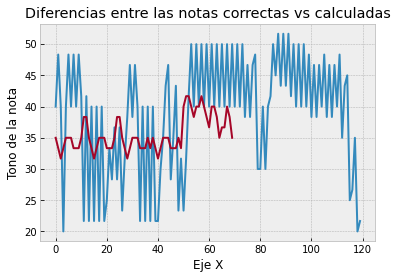

In [ ]:
Notascorrectas= [(3,3), (2,3), (1,3), (2,3), (3,3), (3,3), (3,3), (2,3), (2,3), (2,3), (3,3), (5,3), (5,3),
                 (3,3), (2,3), (1,3), (2,3), (3,3), (3,3), (3,3), (2,3), (2,3), (2,3), (3,3), (5,3), (5,3),
                 (3,3), (2,3), (1,3), (2,3), (3,3), (3,3), (3,3), (2,3), (2,3), (2,3), (3,3), (2,3),
                 (3,3), (2,3), (1,3), (2,3), (3,3), (3,3), (3,3), (2,3), (2,3), (2,3), (3,3), (2,3),
                 (6,3), (1,4), (1,4), (0,4), (5,3), (6,3), (6,3), (1,4), (0,4), (5,3),
                 (4,3), (6,3), (6,3), (5,3), (3,3), (4,3), (4,3), (6,3), (5,3), (3,3)
                 ]
arrcor = []
arrcor2 = []
for i in range(len(Notascorrectas)):
  a,b = Notascorrectas[i]
  arrcor.append(b*10+a*(10/6))
for i in range(len(finish)):
  a,b = finish[i]
  arrcor2.append(b*10+a*(10/6))
print(arrcor)
plt.title('Diferencias entre las notas correctas vs calculadas')
plt.ylabel('Tono de la nota'), plt.xlabel('Eje X')
plt.plot(arrcor2)
plt.plot(arrcor)


## Comparación de gráficas con distintos Threshold

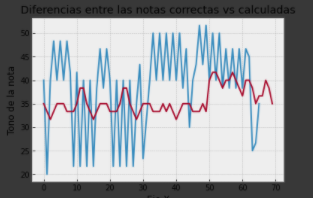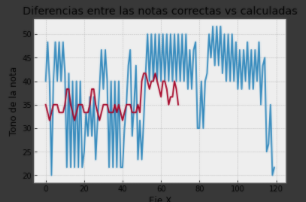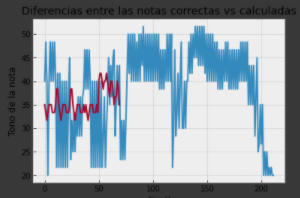

## Análisis de las gráficas obtenidas

Las líneas rojas representan las notas correspondientes a la canción de la partitura hasta la mitad de la misma.

Las líneas azules representan las notas calculadas con el procedimiento empleado para la detección de notas.

- En la primera imagen se ha usado un threshold de 0,65
- En la segunda imagen se ha usado un threshols de 0,64
- En la segunda imagen se ha usado un threshols de 0,63

Se puede decir, a partir de las gráficas, que el algoritmo empleado para la detección de notas a partir de la partitura tiende a parecerse a las reales con la diferencia de precisión y el dominio de estas.

**Los resultados más cercanos a los reales corresponden a la primera imagen con threshold de 0,64.**

## **Reproducción de sonido**

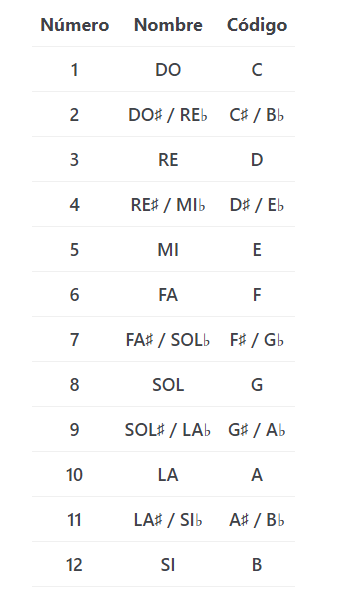

In [ ]:
def frec(nota: int, octava: int) -> int:
    expo = octava * 12 + (nota - 58)
    return int(440 * ((2 ** (1 / 12)) ** expo))

def beep(nota: int, octava: int, duracion: int) -> None:
    framerate = 44100
    t = np.linspace(0, duracion / 1000, int(framerate * duracion / 1000))
    frequency = frec(nota, octava)
    data = np.sin(2 * np.pi * frequency * t)
    #sd.default.device = 'digital output'
    sd.play(data,framerate)
    sd.wait()
    
#atexit.unregister(_lib.Pa_Terminate)
#sd._terminate()
#sd._initialize()
#sd.query_devices()

In [ ]:
def reproducir():
  for i in finish:
    a,b = i
    if (a==0):
      beep(5,b,500)
    if (a==1):
      beep(6,b,500)
    if (a==2):
      beep(8,b,500)
    if (a==3):
      beep(10,b,500)
    if (a==4):
      beep(12,b,500)
    if (a==5):
      beep(1,b,500)
    if (a==6):
      beep(3,b,500)

## **Implementación adicional**
Cálculo del registro más apropiado para cantar la canción trabajada.

Registros:
- Bajo: (Mi octava 2 - Re octava 4)
- Barítono: (La octava 2 - Sol octava 4)
- Tenor: (Do octava 3 - Si octaba 4)
- Contralto: (Sol octava 3 - Mi octava 5)
- Mezzosoprano: (La octava 3 - Sol octava 5)
- Soprano: (Do octava 4 - Si octava 5) 

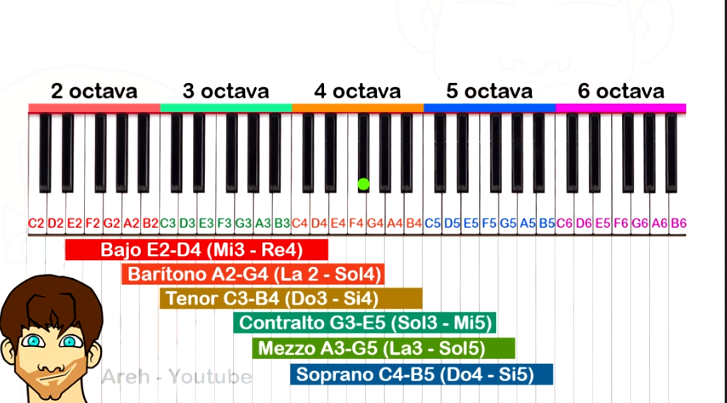

In [ ]:
registros = [[0,"Bajo"],
             [0,"Barítono"],
             [0,"Tenor"],
             [0,"Contralto"],
             [0,"Mezzosoprano"],
             [0,"Soprano"]]
def calcregistro(notes):
  for i in registros:
    i[0] = 0
  for i in notes:
    a,b = i
    if(b<=2):
      registros[0][0]+=1
      if(a>=2):
        registros[1][0]+=1
    if(b==3):
      registros[0][0]+=1
      registros[1][0]+=1
      registros[2][0]+=1
      if(a>=4):
        registros[3][0]+=1
        if(a>=5):
          registros[4][0]+=1
    if(b==4):
      registros[2][0]+=1
      registros[3][0]+=1
      registros[4][0]+=1
      registros[5][0]+=1
      if(a<=4):
        registros[1][0]+=1
        if(a<=1):
          registros[0][0]+=1
    if(b==5):
      registros[5][0]+=1
      if(a<=4):
        registros[4][0]+=1
        if(a<=3):
          registros[3][0]+=1
    if(b==6):
      registros[5][0]+=1

In [ ]:
calcregistro(finish)
registrosord = sorted(registros, key=lambda tup: tup[0],reverse=True)
mx = -1
for i in registrosord:
  mx = max(mx,i[0])
print("El/Los registros máas apropiados para esta canción es/son:")
for i in registrosord:
  if i[0]==mx:
    print(" - ",i[1])

print(registros)

El/Los registros máas apropiados para esta canción es/son:
 -  Tenor
[[78, 'Bajo'], [81, 'Barítono'], [91, 'Tenor'], [86, 'Contralto'], [84, 'Mezzosoprano'], [66, 'Soprano']]


## Resultados

#### **Umbralización**
Para la umbralización de las imágenes de las notas, hemos añadido ruido aditivo gaussiano, el cual fue implementado con el fin de separar regiones de la imagen y eliminar los bordes borrosos de las notas mediante la diferenciación de pixeles con la variable th. Se puede decir que esto permite una mejor apreciación de cada nota, puesto que hace los bordes más distinguibles a simple vista. Sin embargo, los resultados obtenidos con este proceso no han podido evidenciar una influencia positiva sobre la efectividad del algoritmo trabajado.

Este paso puede considerarse engañoso, ya que la idea es más lógica cuando uno piensa en comparar imágenes idénticas (las imágenes de los caracteres poseían algunos pixeles con diferente nivel de gris), pero algunas veces no se reconocían de ninguna manera, con o sin aplicar el ruido.

#### **Función de rotación**
Esta función es bastante útil y trabaja de manera eficiente cuando se manejan imágenes giradas o cuando esta no fue tomada desde el mejor ángulo. Como input, nosotros empleamos la imagen de una partitura girada hacia el lado derecho y con fondo celeste.

Como resultado, se obtiene la hoja cuadrada correctamente, pero con un pérdida considerable de resolución, lo cual, lo vuelve inprocesable por el algoritmo trabajado.

Respecto a los inconvenientes con esta función, no es posible detectar cuando la partitura se encuentra invertida perfectamente, aunque se podría solucionar rotando la imagen, pero no es lo más práctico; ni cuando alguna esquina de la hoja no aparece en la imagen original o es poco distinguible.


#### **Hough Lines**
Con la transformada de Hough es posible encontrar todo tipo de figuras que puedan ser expresadas matemáticamente, tales como rectas, circunferencias o elipses. En este caso, la función de <font color=cian>*Hough_lines()*</font> permite identificar fácilmente la altura de las líneas detectadas en la imagen, sobre las cuales se encontrarán las notas. Conocer su posición es imprescindible para determinar la nota correspondiente, así como la separación entre las distintas líneas.

#### **Match_Template**
La función del <font color=cian>*match_template()*</font> es crucial para obtener las posiciones en las que se encuentran coincidencias de la partitura trabajada con cada nota del arreglo stack[]. El detalle está en que, a lo largo del trabajo, tuvimos muchas dificultades para determinar el umbral sobre el cual definir nuestro threshold sin que detecte otras notas que no correspondían a la buscada y también ocurrió que se detectaban con mayor similitud notas distintas a las buscadas. Estos errores de imprecisión impidieron que podamos comprobar empíricamente la eficiencia de otro algorítmos.


#### **Reducción de puntos**
La función de <font color=cian>*reduce_equals*</font>() me permite eliminar aquellos que se encuentran repetidos y quedarme con aquel que tiene mayor nivel de similitud. Como input, recibe un arreglo con elementos cuyos parámetros son: posición en x, posición en y, índice de similitud y elemento de la imagen. Esta función, incluye el comando sorted y en conjunto con la función <font color=cian>*splitter*</font>(), divide por listas (que representarían los compases) cada imagen detectada dependiendo de su posición vertical. Finalmente, se calcula su posición vertical para conocer la nota y se envía a la función que reproduce el sonido.

### **Cálculo de registro**
La función <font color=cian>*calcregistro*</font>() nos permite identificar los tipos de registro más apropiados para la canción detectada por medio de un algoritmo que suma a unos contadores la cantidad de notas que se encuentran en determinada tesitura. Este algoritmo funciona perfectamente, de manera independiente de la detección digital de las notas.

## Conclusiones


* Para utilizar la función <font color=cian>*match_template*</font> se debe elegir un threshold con mucho cuidado y sobre todo, una data de input con buena resolución e iluminación, puesto que esta función tiende a tener imprecisiones, por lo que se debe dar el escenario ideal para evitarlas. Respecto a ello, el threshold con mejores resultados ha sido 0,64. Cabe resaltar que esta función mejora su eficiencia enormemente cuando las imágenes con las que buscamos hacer match son recortadas lo máximo posible.

* El uso del ruido aditivo gaussiano puede resultar útil cuando necesitas eliminar los bordes borrosos de una imagen con el fin de obtener mayor precisión en los resultados; especialmente si se usa junto con algoritmos que generalmente caen en este problema.

* El uso de la función <font color=cian>HoughLines()</font> permite, de manera eficiente, detectar las líneas horizontales de las partituras y resulta útil para hallar el valor de las posiciones de cada nota detectada.

* Usar la función <font color=cian>cv2.Canny()</font> ha sido muy beneficiosa para la detección de bordes. Gracias al uso de esta, se pudieron conseguir resultados satisfactorios en la parte de rotación de imagen como en la parte de detección de líneas en la partitura.

* La implementación <font color=cian>*order()*</font>, junto con la sección donde se corrige la rotación de la imagen, es una ayuda considerable al momento de tomar en cuenta la complejidad del proceso. Esta función nos evita tener que realizar búsquedas para rotación posible de la letra. Sin embargo, al ser las notas muy pequeñas con respecto a la imagen, se requiere una data con buena calidad para no perder resolución tras este algoritmo.

* La función <font color=cian>*cluster()*</font> fue de mucha utilidad en este trabajo, se utilizó tanto para agrupar las coordenadas obtenidas por <font color=cian>*match_template*</font> como para las obtenidas por <font color=cian>*HoughLines()*</font>, estas agrupaciones fueron un punto de gran avance porque agilizaron el proceso de de ordenamiento para los puntos obtenidos por el match, como para la detección de todos los puntos exactos en los que se inicia la cuenta de las notas en los pentagrámas.

* De manera independiente, la función <font color=cian>*calcregistro()*</font> puede utilizarse para recomendar el registro adecuado de una canción dadas las notas y su octava correspondiente en un arreglo.


## Bibliografía

* ¿Cuál es tu registro? - Ésto no determina tu voz. (2017, 4 julio). [Vídeo]. YouTube. https://www.youtube.com/watch?v=GSsXLGOIN941

* Canny Edge Detection. (s. f.). opencv-python-tutroals. Recuperado 28 de noviembre de 2020, de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

* Hough Line Transform. (s. f.). opencv-python-tutroals. Recuperado 28 de noviembre de 2020, de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

* Farrant, D. (2020, 24 septiembre). Types Of Musical Scales: Beginner’s Guide. Hello Music Theory: Learn Music Theory Online. https://hellomusictheory.com/learn/music-scales-beginners-guide/

